#  UK Road Traffic Analysis (2000 - 2024) 🚗📊
Project Type: Exploratory Data Analysis (EDA) + Data Visualization using Plotly in Python
Tools Used: Python, Pandas, Plotly, Jupyter Notebook

🔍 Objective:
This project focuses on analyzing road traffic trends in the United Kingdom between the years 2000 and 2024. The main aim was to explore how different vehicle types, regions, road types, and highway authorities have changed in terms of traffic volume over time.

I followed a project structure from a Udemy course and added some customizations to better understand data analysis and storytelling with data.

## 🛣️ Dataset Overview:
The dataset includes:

AADF (Annual Average Daily Flow): Average number of vehicles passing a point per day in a year.

Volume of Traffic: Total miles or kilometers driven by all vehicles on a road segment in a year.
(It is calculated as: AADF × Road Length × 365)

### 📌 Key Questions Explored:

1. Traffic Evolution Across Categories
📊 How has the total miles driven per year evolved for different vehicle types in the UK from 2000 to 2018?

a. Based on regions (e.g., London, North East, South West, etc.)
b. Across major road categories (A Roads, Motorways, Minor Roads)
c. On the Top 10 busiest roads in the UK
d. Across Top 10 busiest highway authorities

2. Road-Wise and Authority-Wise Traffic Volume & AADF
a. What is the average yearly traffic volume (miles driven) on each major road type?
b. What is the AADF trend for different UK regions and for the busiest roads/highway authorities?

3. Vehicle-Wise Trends Over Time
a. What is the trend of each vehicle type (Cars, Buses, Vans, Cycles, HGVs, etc.) across all years?
b. How many miles were driven by each type of vehicle on different road types (Motorways, A-roads, etc.)?

### 🎯 What I Learned:
Basic data cleaning and exploration using Pandas

Visual storytelling using Plotly (line, bar, pie, choropleth maps)

Grouping, aggregating, and filtering large datasets

Interpreting real-world trends in transportation and policy

### 💡 Additions I Made:
To personalize and deepen my understanding, I also:

Added year-over-year percentage change plots

Added a Streamlit version of the dashboard (optional)

Explained my own observations under each visualization

dataset link = https://roadtraffic.dft.gov.uk/downloads

1.Import required libraries and  dataset

In [1]:
import math 
import calendar
import pandas as pd
import datetime


import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [2]:
##TRAFFIC DATASETS 
import os
file_path = os.path.join('data', 'Uk_aadf.csv' )
df = pd.read_csv(file_path,encoding='latin1')

C:\Users\weare\AppData\Local\Temp\ipykernel_16188\325899423.py:4: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.head(5)

,count_point_id,year,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,local_authority_code,road_name,road_category,...,buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles
0,51,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,25,451,30,0,0,0,0,0,30,1430
1,51,2001,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,27,451,28,0,0,0,0,0,28,1446
2,51,2002,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,28,467,28,0,0,0,0,0,28,1518
3,51,2003,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,29,509,27,0,0,0,0,0,27,1622
4,51,2004,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,35,296,77,6,0,1,0,0,84,928


In [4]:
#size of the df
df.shape

(578217, 34)

In [5]:
#check for missing values
df.isnull().sum()

count_point_id                       0
year                                 0
region_id                            0
region_name                          0
region_ons_code                      0
local_authority_id                   0
local_authority_name                 0
local_authority_code                 0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name        130875
end_junction_road_name          130862
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                  130291
link_length_miles               130291
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
LGVs                     

In [6]:
##lets drop the two columns with the most missing values
uk_traffic = df.drop(['start_junction_road_name', 'end_junction_road_name'], axis=1)

In [7]:
uk_traffic.dropna(inplace=True)

In [8]:
uk_traffic.head()

,count_point_id,year,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,local_authority_code,road_name,road_category,...,buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles
0,51,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,25,451,30,0,0,0,0,0,30,1430
1,51,2001,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,27,451,28,0,0,0,0,0,28,1446
2,51,2002,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,28,467,28,0,0,0,0,0,28,1518
3,51,2003,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,29,509,27,0,0,0,0,0,27,1622
4,51,2004,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,PA,...,35,296,77,6,0,1,0,0,84,928


In [9]:
#This code adds up the counts of three types of vehicles — heavy goods vehicles (all_hgvs), all motor vehicles (all_motor_vehicles), and pedal cycles (pedal_cycles) — and stores the result in a new column called AllVehicles in the uk_traffic DataFrame.
uk_traffic['AllVehicles'] = uk_traffic['all_HGVs'] + uk_traffic['all_motor_vehicles'] + uk_traffic['pedal_cycles']

In [10]:
# List of vehicle categories in the dataset that we want to calculate miles driven for

vehicles = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'LGVs', 
 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle'
, 'HGVs_4_or_more_rigid_axle','HGVs_3_or_4_articulated_axle' , 'HGVs_5_articulated_axle' ,	
'HGVs_6_articulated_axle', 'all_HGVs' , 'all_motor_vehicles']


In [11]:
# Loop through each type of vehicle in the list
for vehicle in vehicles:
    # For each vehicle type, calculate the total miles driven in a year on a given road segment.
    # The formula multiplies:
    # 1. The traffic volume of that vehicle on the road (assumed to be daily volume)
    # 2. The length of the road segment in miles
    # 3. Number of days in a year (365)
    # This gives the total annual miles driven by that vehicle type on that road segment.
    uk_traffic[vehicle + 'miles_driven'] = uk_traffic[vehicle] * uk_traffic['link_length_miles'] * 365


In [12]:
# Count the number of occurrences of each road category in the dataset.
# This helps us understand how many road segments belong to each category.
uk_traffic['road_category'].value_counts()

road_category
PA    362716
TA     56661
TM     27609
PM       940
Name: count, dtype: int64

Display  the distribution of traffic volume (or relevant metric) across different road categories
#'PA', 'TA', 'TM', and 'PM' appear to be codes representing types of roads
#For example:
#PA might be Primary A roads
#TA could be Trunk A roads
#TM might be Trunk Minor roads
#PM could be Primary Minor roads

#The numbers show how much total traffic (or another metric like vehicle count) is associated with each type:
#PA: 362,716 (highest volume)
#TA: 56,661
#TM 27,609
#PM: 940 (least volume)



In [13]:
rd_category =uk_traffic.road_category.unique().tolist()
print(rd_category)

['PA', 'TM', 'TA', 'PM']


In [14]:
road_category_description = ['Class A Principal Road', 'M or Class A Trunk Motorway', 'Class A Trunk Road', 
                             'M or Class A Principal Motorway']

In [15]:
for road in range(len(rd_category)):
    uk_traffic.loc[uk_traffic['road_category'] == rd_category[road], 'road_category'] = road_category_description[road]

###### ✅ Result: The road_category column now contains descriptive labels instead of cryptic codes, making your data easier to read and interpret.


In [16]:
print(uk_traffic['road_category'])

0         Class A Principal Road
1         Class A Principal Road
2         Class A Principal Road
3         Class A Principal Road
4         Class A Principal Road
                   ...          
447921    Class A Principal Road
447922    Class A Principal Road
447923    Class A Principal Road
447924    Class A Principal Road
447925    Class A Principal Road
Name: road_category, Length: 447926, dtype: object


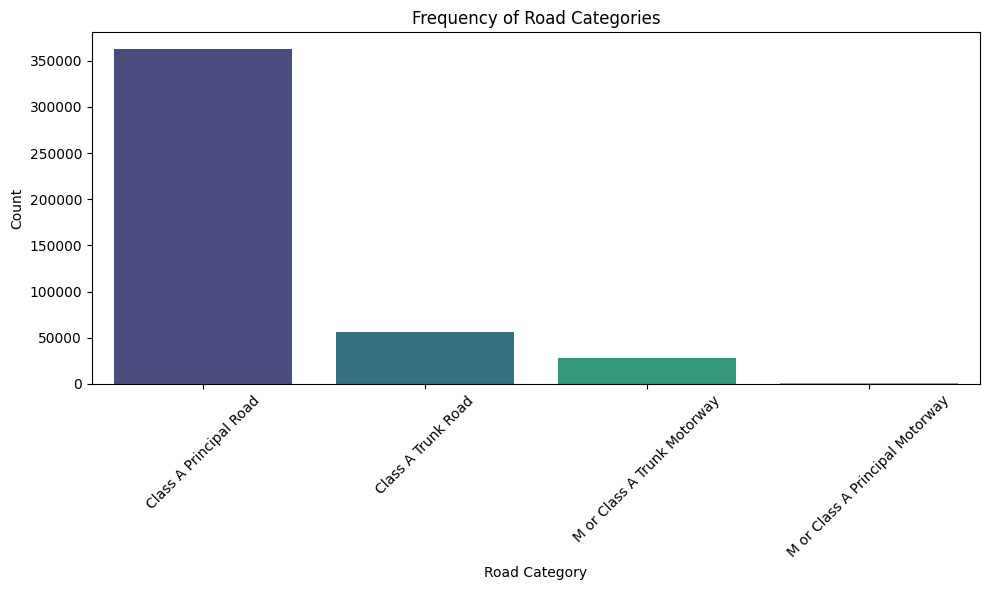

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each category
category_counts = uk_traffic['road_category'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Frequency of Road Categories')
plt.xlabel('Road Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


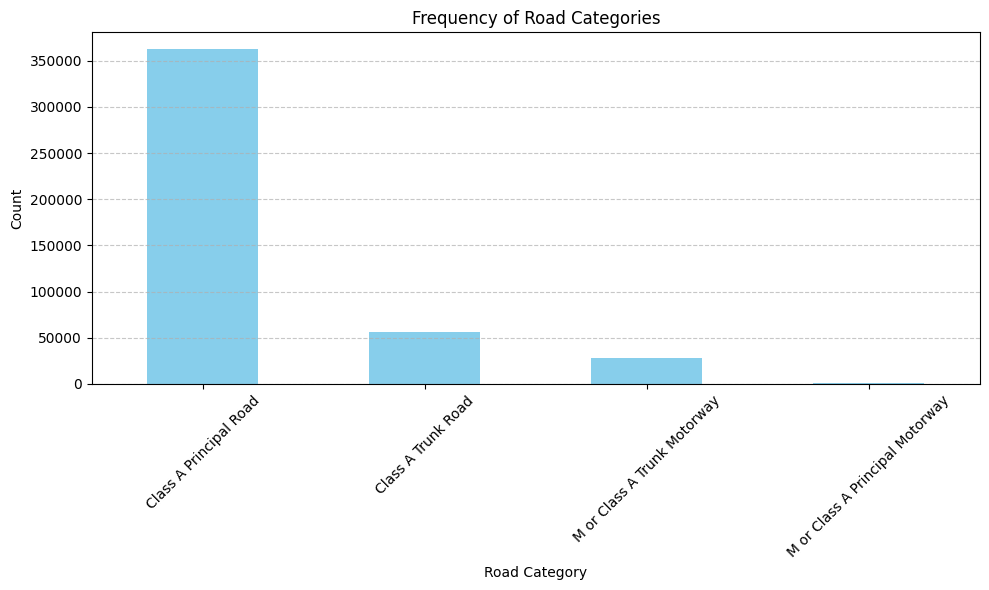

In [18]:
import matplotlib.pyplot as plt

# Count occurrences of each category
counts = uk_traffic['road_category'].value_counts()

# Plot bar graph
plt.figure(figsize=(10,6))
counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Road Categories')
plt.xlabel('Road Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
uk_traffic['northing'].max()#This line finds the maximum value in the northing column of the uk_traffic DataFrame.

np.int64(1205400)

In [20]:
uk_traffic.shape

(447926, 46)

In [21]:
uk_traffic = uk_traffic.loc[uk_traffic['northing']!=uk_traffic['northing'].max()]#This line of code filters out the row with the maximum northing value from your uk_traffic

### First, Lets start with plotting the locations where the AADF measurement


In [22]:
uk_gpd = uk_traffic.copy()
gb_shape= gpd.read_file(r'data/UK_shape_files/MRDB_2024_published.shp')


shapefile download dataset link = https://storage.googleapis.com/dft-statistics/road-traffic/mrdb-2024.zip

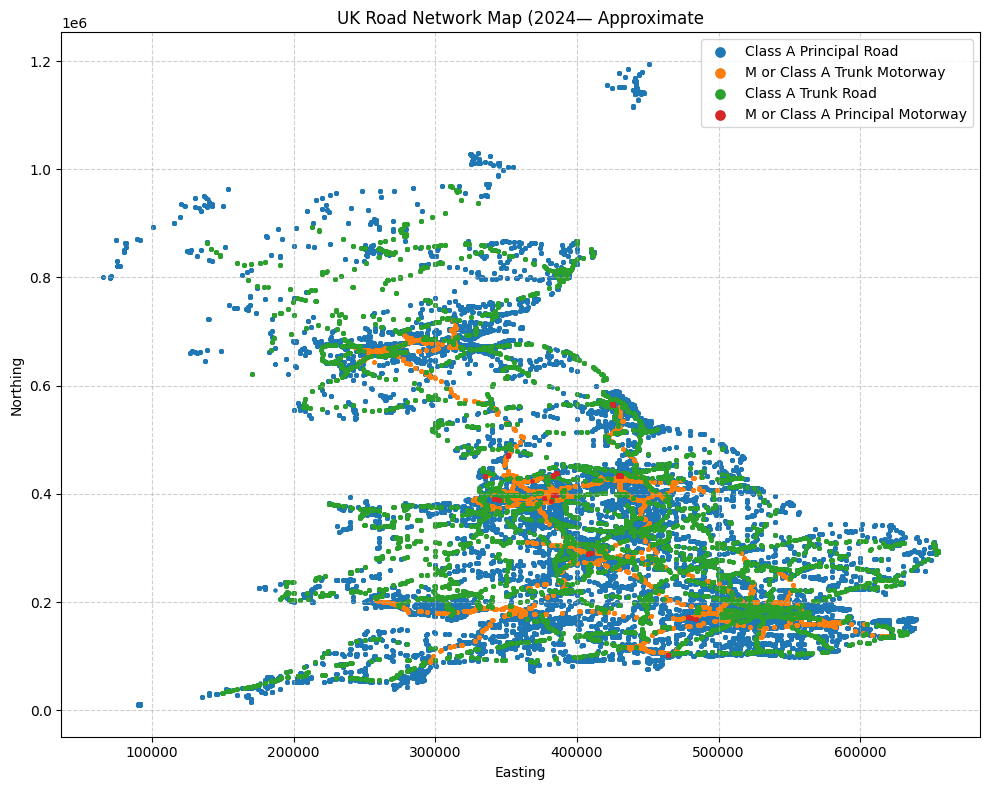

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for category in uk_traffic['road_category'].unique():
    subset = uk_traffic[uk_traffic['road_category'] == category]
    plt.scatter(subset['easting'], subset['northing'], label=category, s=5)

plt.title('UK Road Network Map (2024— Approximate')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(markerscale=3)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


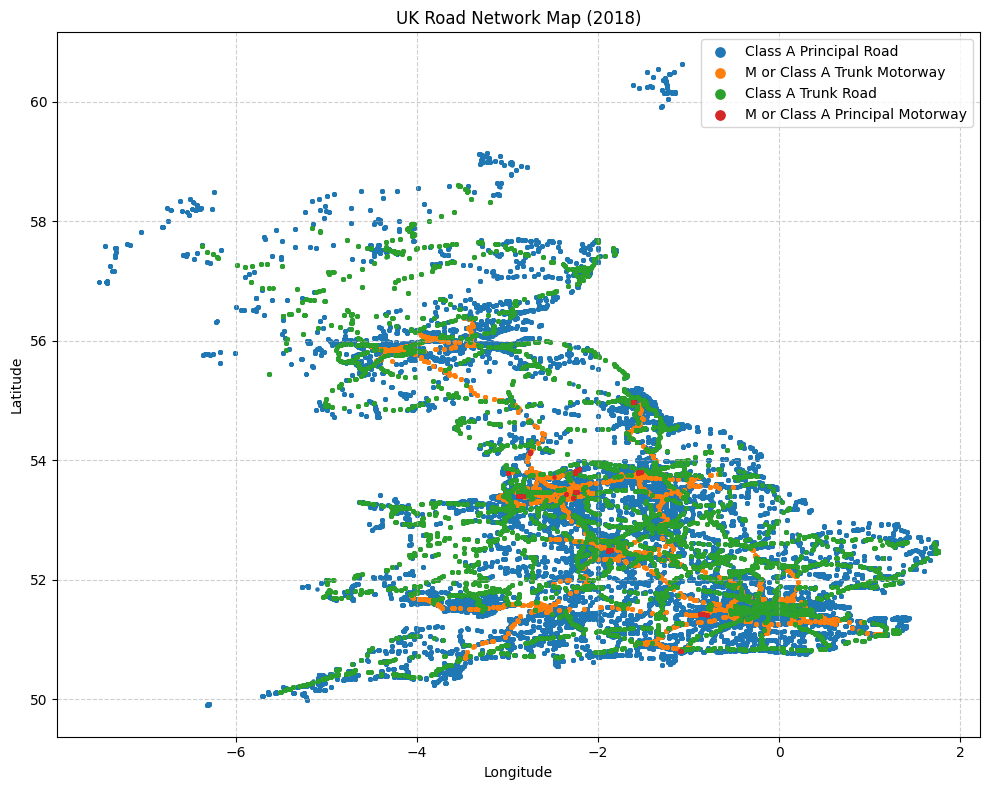

In [24]:
plt.figure(figsize=(10, 8))

for category in uk_traffic['road_category'].unique():
    subset = uk_traffic[uk_traffic['road_category'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], label=category, s=5)

plt.title('UK Road Network Map (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(markerscale=3)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:
#convert the uk_traffic (uk_gpd) df to GeopandasDf
points = uk_gpd.apply(lambda row: Point(row.easting, row.northing), axis=1)
uk_gpd = gpd.GeoDataFrame(uk_gpd, geometry=points)

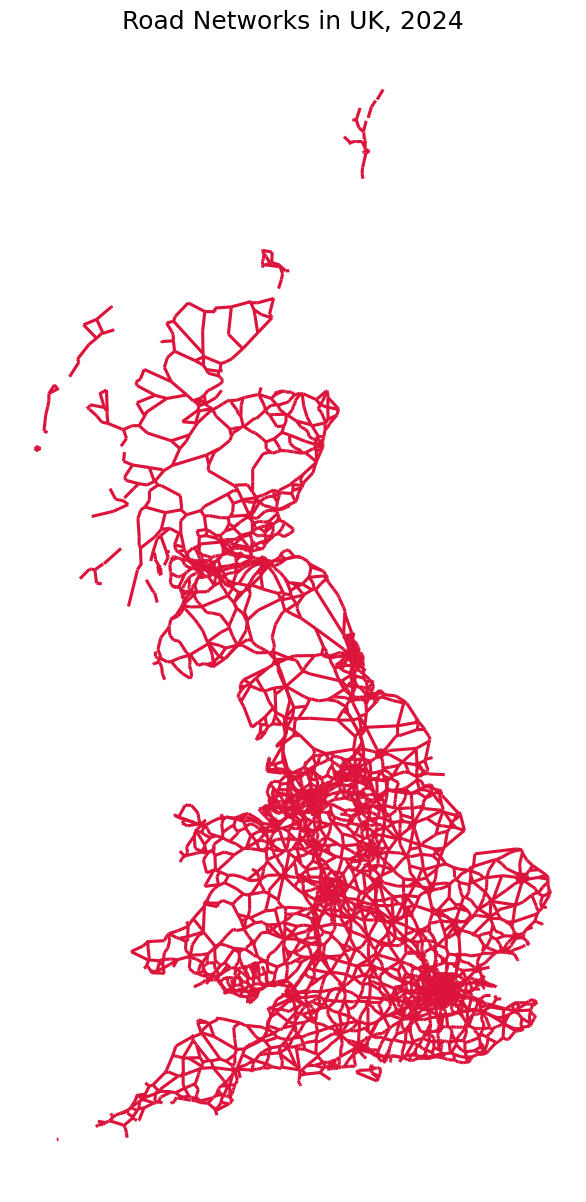

In [26]:
sns.set_context('talk')
ax = gb_shape.plot(figsize=(25,15), color='crimson')
ax.set(title='Road Networks in UK, 2024')
ax.set_axis_off()

C:\Users\weare\AppData\Local\Temp\ipykernel_16188\1749314588.py:7: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



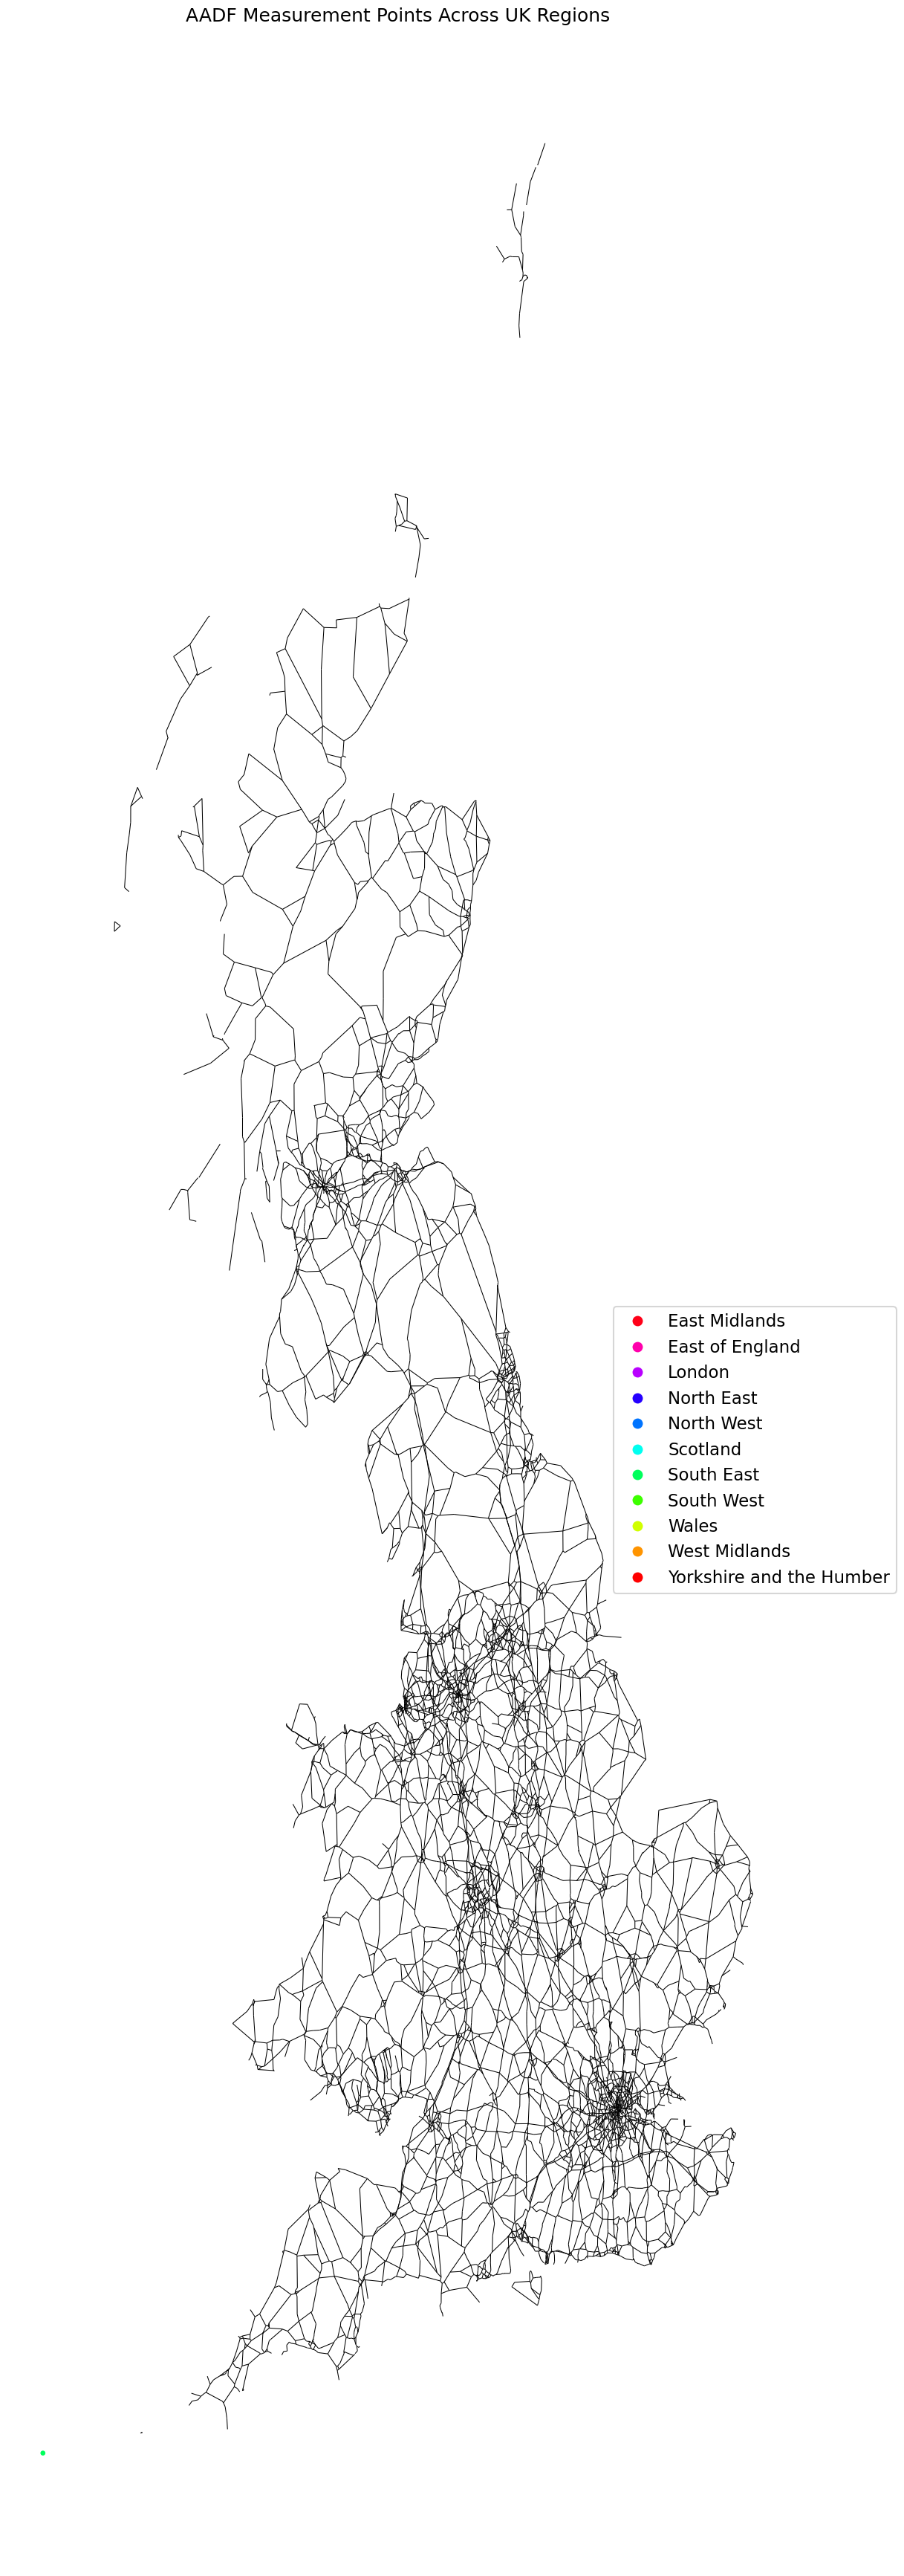

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# ✅ Load your AADF CSV file
df = pd.read_csv(r'data/Uk_aadf.csv')

# ✅ Convert to GeoDataFrame (make sure you have lon/lat columns)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),  # change column names if needed
    crs='EPSG:4326'  # assuming WGS84
)

# ✅ Load UK shapefile
gb_shape = gpd.read_file(r'data\UK_shape_files\MRDB_2024_published.shp')

# ✅ Optional: simplify geometries for speed
gdf['geometry'] = gdf['geometry'].simplify(0.001)

# ✅ Create plot
fig, ax = plt.subplots(figsize=(25,35))
gb_shape.plot(ax=ax, color='black', linewidth=0.75)

gdf.plot(
    ax=ax,
    column='region_name',  # make sure this exists in your CSV
    markersize=40,
    legend=True,
    cmap='hsv_r',
    edgecolor='white'
)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.5))
ax.set_title("AADF Measurement Points Across UK Regions", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


In [28]:
#convert the uk_traffic (uk_gpd) df to GeopandasDf
points = uk_gpd.apply(lambda row: Point(row.easting, row.northing), axis=1)
uk_gpd = gpd.GeoDataFrame(uk_gpd, geometry=points)

Text(0.5, 1.0, 'Road Networks (points) where AADF measurement were taken between 2000 - 2024 in UK')

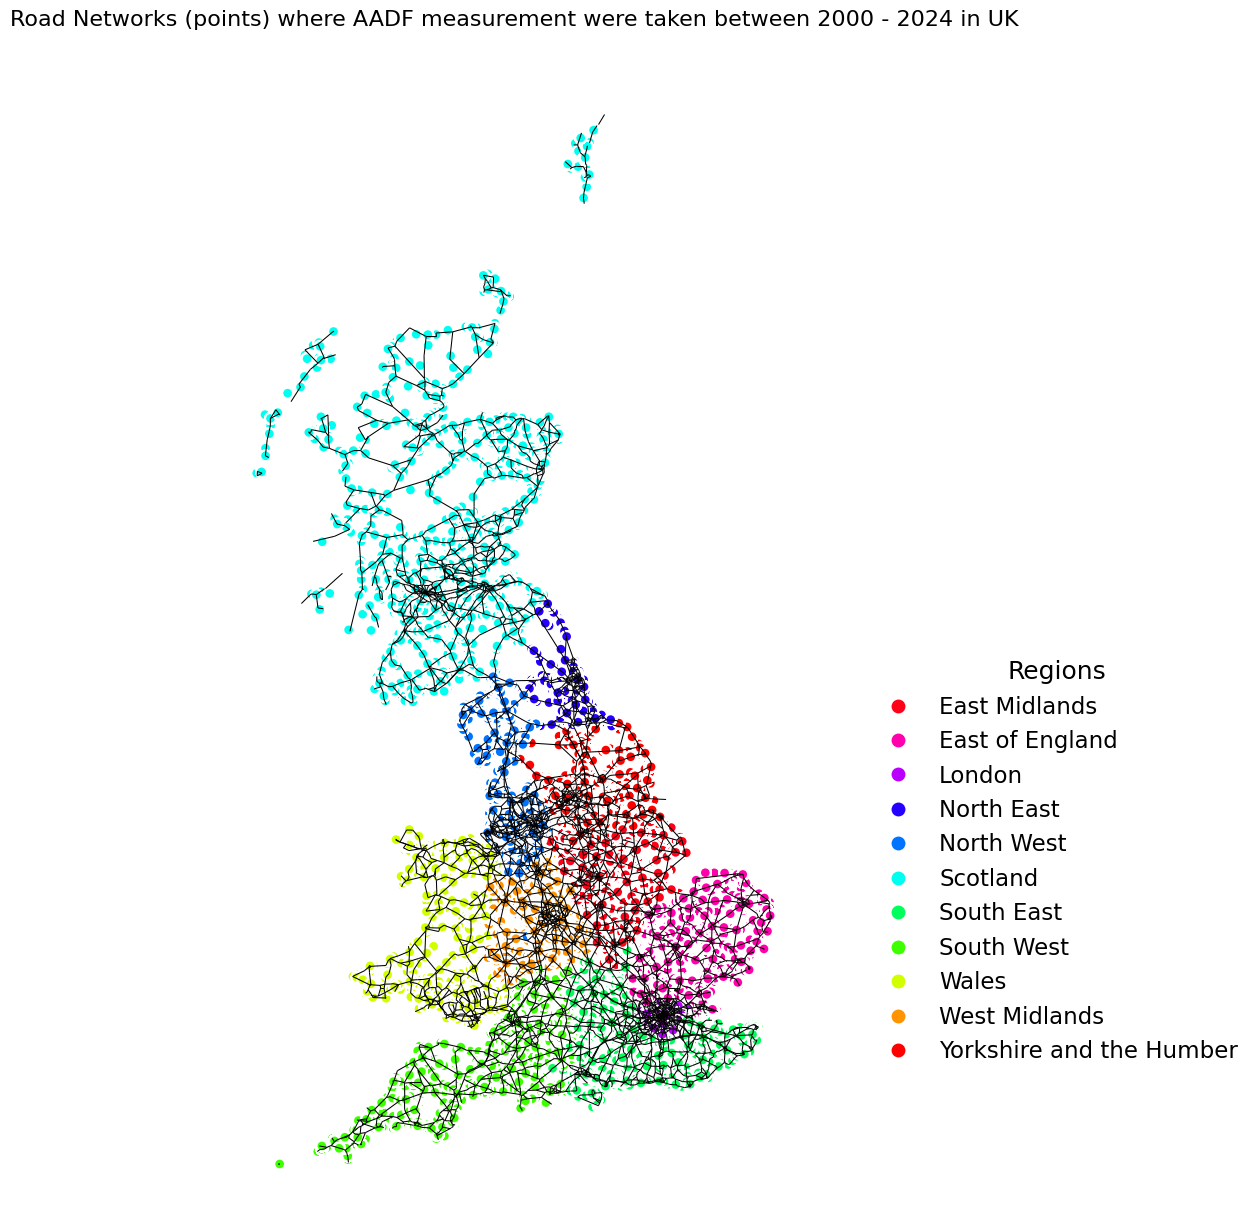

In [29]:
#lets plot points where AADF were measured based on UK regions
ax = gb_shape.plot(figsize=(30,15), color='black', linewidth=0.75)
uk_gpd.plot(column='region_name', ax=ax, markersize=60, legend = True, cmap='hsv_r', edgecolor='white')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.1,0.5))
leg.set_title('Regions')
leg.set_frame_on(False)
ax.set_axis_off()
ax.set_title('Road Networks (points) where AADF measurement were taken between 2000 - 2024 in UK', fontsize=16, pad=10)

#### What is the evolution of traffic (in terms of miles driven per year) for different types of vehicles (i.e. Pedal Cycles, Motor cycles, Cars and Taxis, Buses and Coaches, Vans, All motor vehicles, Heavy Goods Vehicles and All Vehicles) in UK, based on:
a. Different Regions of UK

b. Major Road classes in UK

c. Top 10 busiest roads in UK

d. Top 10 busiest highway authorties in UK

In [30]:
####To start with let extract top 10 busiest roads
##sort starting with the busiest road based on its average vehicle mile per year

rd_agg = uk_traffic.groupby(['year', 
                             'road_name']).AllVehicles.agg(['count', 
                                                                        'sum', 'mean']).sort_values(by = 'mean', ascending = False)
rd_agg.reset_index(inplace = True)

📊 Groups UK traffic data by year and road_name

🧮 Calculates count, sum, and mean of vehicles for each group

🔝 Sorts the results by mean (average vehicles) in descending order

🔄 Resets the index for cleaner formatting

This gives you the busiest roads based on average traffic per year — ready to pull the top 10! 🚗💨

In [31]:
rd_agg_100 = rd_agg[:100].copy()

📌 Short Explanation: Takes the top 100 busiest road entries from rd_agg and creates a separate copy named rd_agg_100, so it can be safely modified without affecting the original data.

In [32]:
#take just the first 10 roads
print(rd_agg_100['road_name'].unique().tolist())

['M25', 'M60', 'A4202', 'A282', 'M1', 'M62', 'M27', 'M42']


In [33]:
#extract top 10 busiest Highway authority based on average vehicle mile per year

rd_agg = uk_traffic.groupby(['year', 'local_authority_name']).AllVehicles.agg(['count', 'sum', 'mean']).sort_values(by = 'sum', ascending = False)
rd_agg.reset_index(inplace = True)

In [34]:
rd_agg_100 = rd_agg[:140].copy()
#take just the first 10 highway authority
print(rd_agg_100['local_authority_name'].unique().tolist())

['Kent', 'Hampshire', 'Surrey', 'Hertfordshire', 'Essex', 'Lancashire', 'Staffordshire', 'Warwickshire']


📌 Short Explanation: This function creates a traffic flow chart showing trends (2000–2018) for a specific vehicle type (vehicle) across a given category (column, like roads or authorities). It:

📊 Aggregates yearly data by mean mileage

🎨 Colors and plots traffic trends using plotly

🛣️ Filters key locations (top roads, authorities, etc.)

📍 Adds context to the chart title for clarity

In [35]:
import plotly.graph_objs as go
import pandas as pd

def vehicles_traffic_flow(df, vehicle, column, save_html=False, html_filename='traffic_trend.html'):
    # Step 1: Group data based on input column
    if column == 'road_name':
        loc_agg = df.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = ['M25', 'M60', 'A4202', 'A282', 'M1', 'M62', 'M27', 'M42']
    elif column == 'local_authority_name':
        loc_agg = df.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = ['Kent', 'Hampshire', 'Surrey', 'Essex', 'Hertfordshire', 
                     'Lancashire', 'Staffordshire', 'Warwickshire', 'Northamptonshire', 'Cheshire']
    else:
        loc_agg = df.groupby(['year', column])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
        loc_names = loc_agg[column].unique().tolist()

    # Step 2: Prepare Plotly traces
    list_traces = []
    colors = ['lightslategray', 'crimson', 'darkcyan', 'darkgoldenrod', 'cornsilk', 
              'turquoise', 'limegreen', 'darkorchid', 'palevioletred', 'forestgreen', 
              'silver', 'lightsteelblue']
    
    for i in range(min(len(loc_names), len(colors))):
        name_agg = loc_agg[loc_agg[column] == loc_names[i]]
        trace = go.Scatter(
            x=name_agg['year'],
            y=name_agg['mean'],
            mode="lines+markers",
            name=loc_names[i],
            line=dict(color=colors[i], width=2.5)
        )
        list_traces.append(trace)

    # Step 3: Set context for title based on column
    if column == 'road_category':
        context = 'on Major Road Classes in UK'
    elif column == 'region_name':
        context = 'in UK Regions'
    elif column == 'road_name':
        context = 'on the 10 Busiest Roads in UK'
    elif column == 'local_authority_name':
        context = 'on the 10 Busiest Highway Authorities in UK'
    else:
        context = column

    # Step 4: Map vehicle column to human-readable label
    vehicle_labels = {
        'pedal_cyclesmiles_driven': 'Pedal Cycles',
        'all_motor_vehicles': 'Motor Vehicles',
        'all_motor_vehiclesmiles_driven': 'All Vehicles',
        'all_hgvsmiles_driven': 'Heavy Goods Vehicles (Lorries)',
        'cars_and_taxismiles_driven': 'Cars and Taxis',
        'two_wheeled_motor_vehiclesmiles_driven': 'Motor Cycles',
        'buses_and_coachesmiles_driven': 'Buses and Coaches',
        'AllVehicles': 'All Vehicles',
        'lgvsmiles_driven': 'Vans'
    }
    content = vehicle_labels.get(vehicle, vehicle)

    # Step 5: Create layout and plot
    layout = go.Layout(
        title=f"<b>{content} traffic trends {context}, 2000 - 2024</b>",
        width=1000,
        height=600,
        xaxis=dict(
            title=dict(text="<b>Year</b>", font=dict(size=16, color='#7f7f7f')),
            tickfont=dict(size=15, color='darkslateblue')
        ),
        yaxis=dict(
            title=dict(text="<b>Miles Driven per Year</b>", font=dict(size=16, color='#7f7f7f')),
            tickfont=dict(size=15, color='darkslateblue')
        )
    )

    fig = go.Figure(data=list_traces, layout=layout)
    fig.update_xaxes(dtick=2)
    
    if save_html:
        fig.write_html(html_filename)
        print(f"✅ HTML file saved: {html_filename}")
    else:
        fig.show()


### a. Vehicles traffic flow / trend based on different regions in UK, from 2000 - 2024


In [36]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'region_name', save_html=True, html_filename='all_vehicles_by_region.html')


✅ HTML file saved: all_vehicles_by_region.html


In [37]:
### All heavy good vehicles --- UK Regions ###
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'region_name' ,  save_html=True, html_filename=' All heavy good vehicles.html')


✅ HTML file saved:  All heavy good vehicles.html


In [38]:
### All motor vehicles vehicles --- UK Regions###

vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'region_name' ,  save_html=True, html_filename=' all_motor_vehiclesmiles_driven .html')


✅ HTML file saved:  all_motor_vehiclesmiles_driven .html


In [39]:

vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'region_name' ,  save_html=True, html_filename='cars_and_taxismiles_driven.html')


✅ HTML file saved: cars_and_taxismiles_driven.html


In [41]:
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'region_name' , save_html=True,html_filename= ' two_wheeled.html')

✅ HTML file saved:  two_wheeled.html


In [42]:
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'region_name' , save_html=True,html_filename= 'pedal_cycle.html')

✅ HTML file saved: pedal_cycle.html


In [43]:
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'region_name' , save_html=True,html_filename= 'vans_traffic.html')

✅ HTML file saved: vans_traffic.html


In [44]:

vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'region_name' , save_html=True,html_filename= 'buses_and_coaches.html')


✅ HTML file saved: buses_and_coaches.html


## Major Observations:


#### Major Observations (2000–2024):

Overall Traffic Trends

* Miles driven by all vehicles across UK regions showed steady growth from 2000 to 2018, similar to earlier trends.

However, there is a notable sharp decline in 2020, likely due to the impact of the COVID-19 pandemic and lockdowns.

A gradual recovery is observed post-2021, with mileage returning to or near pre-2020 levels by 2024.

* Heavy Goods Vehicles (HGVs) & Cars/Taxis

These categories followed the same overall pattern: growth till 2018, sharp drop in 2020, and recovery by 2024.

HGV mileage remains vital for regional logistics and shows resilience post-pandemic.

Car & taxi usage rebounded steadily, indicating a return of personal and commercial travel.

* Motorcycles, Buses, and Coaches

Motorcycles show fluctuating trends, with notable drops in 2020 but a partial rebound afterward.

Buses and coaches experience a steady decline from 2015 onwards, with a more pronounced dip in 2020.

* London remains an exception, where usage is more stable due to consistent demand for public transport.

* Pedal Cycles (Bicycles)

* London continues to lead in miles driven by pedal cycles.

There's a clear upward trend, with accelerated growth post-2020, possibly driven by eco-friendly travel policies and lifestyle changes during the pandemic.

* Light Vans

Consistent growth from 2000 to 2018, followed by a dip in 2020, and strong recovery post-2021.

The post-pandemic period shows increased van usage, likely reflecting the growth of e-commerce and delivery services.

* Regional Trends

* London consistently stands out in pedal cycle, bus, and coach usage.

* Other regions show similar post-2020 recovery patterns, but the pace and extent of recovery vary depending on the vehicle type and region.

####  🧠Notable Insight :
London’s relative stability in transport patterns, even during disruptive years like 2020, reflects long-term investment in public infrastructure and urban travel behavior that is less sensitive to national-level shocks.

### b. Vehicles traffic flow / trend on Major Road Classes in UK, from 2000 - 2024

In [50]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_category', save_html=True, html_filename='motor_vehicles_by_trend.html')


✅ HTML file saved: motor_vehicles_by_trend.html


In [51]:
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'road_category' ,  save_html=True, html_filename=' All_heavy_good_vehicles_trend.html')
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_category' ,  save_html=True, html_filename=' all_motor_vehiclesmiles_driven_trend.html')
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'road_category' ,  save_html=True, html_filename='cars_and_taxismiles_driven_trend.html')
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'road_category' , save_html=True,html_filename= ' two_wheeled_trend.html')
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'road_category' , save_html=True,html_filename= 'pedal_cycle_trend.html')
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'road_category' , save_html=True,html_filename= 'vans_traffic_trend.html')
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'road_category' , save_html=True,html_filename= 'buses_and_coaches_trend.html')


✅ HTML file saved:  All_heavy_good_vehicles_trend.html
✅ HTML file saved:  all_motor_vehiclesmiles_driven_trend.html
✅ HTML file saved: cars_and_taxismiles_driven_trend.html
✅ HTML file saved:  two_wheeled_trend.html
✅ HTML file saved: pedal_cycle_trend.html
✅ HTML file saved: vans_traffic_trend.html
✅ HTML file saved: buses_and_coaches_trend.html


In [52]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_category', save_html=True, html_filename='all_motor_vehicles_by_trend.html')


✅ HTML file saved: all_motor_vehicles_by_trend.html


### Major Observations:
- Class M or A Trunk Motorway is the most busiest road class/category in UK between 2000 - 2024.
- Miles driven by all Vehicles, Motor Vehicles, Heavy Goods Vehicles, Cars and Taxis are broadly stable between 2000 - 2024.
- Motor Cycles is most commonly driven on Class A or M Trunk Motorway and it shows a steady decline on this road class, while for other road classes is broadly stable with some flunctuations esp. on Class A trunk Road.
- Pedal Cycle is commonly driven on Class A roads and it shows steady increase on Principal road since 2012, but has been considerably stable on Trunk Road with some flunctuations.
- Miles driven by Light Vans shows steady growth on all Road Classes.
- Buses and Coaches show steady decline on Class M or A Trunk Motorway, and for other road classes it has been broadly stable.

vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'region_name', save_html=True, html_filename='all_vehicles_by_region.html')

vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'region_name' ,  save_html=True, html_filename=' All heavy good vehicles.html')

vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'region_name' ,  save_html=True, html_filename=' all_motor_vehiclesmiles_driven .html')

vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'region_name' ,  save_html=True, html_filename='cars_and_taxismiles_driven.html')

vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'region_name' , save_html=True,html_filename= ' two_wheeled.html')

vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'region_name' , save_html=True,html_filename= 'pedal_cycle.html')

vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'region_name' , save_html=True,html_filename= 'vans_traffic.html')

vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'region_name' , save_html=True,html_filename= 'buses_and_coaches.html')


# c. Vehicles traffic flow / trend on the 10 busiest roads in UK, from 2000 - 2024

In [37]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_name', save_html=True, html_filename='All_vehicle_traffic_trend_on_10_busiest_road.html')

✅ HTML file saved: All_vehicle_traffic_trend_on_10_busiest_road.html


In [38]:
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'road_name' ,  save_html=True, html_filename='All_Heavy_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_name' ,  save_html=True, html_filename='All_motor_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'road_name' ,  save_html=True, html_filename='All_Cars_and_taxies_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'road_name' , save_html=True,html_filename= 'All_two-wheeled_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'road_name' , save_html=True,html_filename= 'pedal_cycle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'road_name' , save_html=True,html_filename= 'Vans_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'road_name' , save_html=True,html_filename= 'Buses_and_Coaches_traffic_trend_on_10_busiest_road.html')


✅ HTML file saved: All_Heavy_vehicle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: All_motor_vehicle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: All_Cars_and_taxies_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: All_two-wheeled_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: pedal_cycle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Vans_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Buses_and_Coaches_traffic_trend_on_10_busiest_road.html


## Major Observations:

* A1(M) was the busiest road between 2002 - 2005 in UK, but dropped drastically from 2006 onwards

* A1(T) existed in UK between 2006 - 2011.
Miles driven by all vehicles, motor vehicles, cars and taxis and heay goods vehicles on the busiest roads have been broadly stable except for A1(M) that showed an abrupt drop in 2005.

* Light Vans have been showing steady increase across the busiest roads except for A1(M) that has been steady declining in terms of miles driven by vehicles.

* Miles driven by Motor Cycles have been steadily declining across all the top 10 busiest roads.

# d. Vehicles traffic flow / trend based on 10 busiest Highway Authorities in UK, from 2000 - 2024

In [ ]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_name', save_html=True, html_filename='All_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'road_name' ,  save_html=True, html_filename='All_Heavy_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'road_name' ,  save_html=True, html_filename='All_motor_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'road_name' ,  save_html=True, html_filename='All_Cars_and_taxies_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'road_name' , save_html=True,html_filename= 'All_two-wheeled_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'road_name' , save_html=True,html_filename= 'pedal_cycle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'road_name' , save_html=True,html_filename= 'Vans_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'road_name' , save_html=True,html_filename= 'Buses_and_Coaches_traffic_trend_on_10_busiest_road.html')

In [39]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name', save_html=True, html_filename='All_vehicle_traffic_trend_on_10_busiest_Highwayauthority_road.html')

✅ HTML file saved: All_vehicle_traffic_trend_on_10_busiest_Highwayauthority_road.html


In [40]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name', save_html=True, html_filename='Highwayauthority_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_Heavy_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_motor_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_Cars_and_taxies_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_two-wheeled_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_pedal_cycle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_Vans_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_Buses_and_Coaches_traffic_trend_on_10_busiest_road.html')

✅ HTML file saved: Highwayauthority_vehicle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_Heavy_vehicle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_motor_vehicle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_Cars_and_taxies_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_two-wheeled_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_pedal_cycle_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_Vans_traffic_trend_on_10_busiest_road.html
✅ HTML file saved: Highwayauthority_Buses_and_Coaches_traffic_trend_on_10_busiest_road.html


# Major Observations:
* Cheshire highway authority existed between 2000 - 2008.

* Miles driven by all vehicles, motor vehicles, heavy goods vehicles, cars and taxis have been growing slightly and steadily with little flunctuations.
* Light vans shows steady growth across all the top 10 highways authorities.
* Miles driven by pedal cycles have been showing flunctuating growth with a major drop in years 2005 and 2008.

* Miles driven by motor cycles shows steady decline across all highway authorities.

In [52]:
uk_traffic.head()

,count_point_id,year,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,local_authority_code,road_name,road_category,...,buses_and_coachesmiles_driven,LGVsmiles_driven,HGVs_2_rigid_axlemiles_driven,HGVs_3_rigid_axlemiles_driven,HGVs_4_or_more_rigid_axlemiles_driven,HGVs_3_or_4_articulated_axlemiles_driven,HGVs_5_articulated_axlemiles_driven,HGVs_6_articulated_axlemiles_driven,all_HGVsmiles_driven,all_motor_vehiclesmiles_driven
0,51,2000,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,Class A Principal Road,...,1733.75,31276.85,2080.50,0.0,0.0,0.00,0.0,0.0,2080.50,99170.5
1,51,2001,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,Class A Principal Road,...,1872.45,31276.85,1941.80,0.0,0.0,0.00,0.0,0.0,1941.80,100280.1
2,51,2002,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,Class A Principal Road,...,1941.80,32386.45,1941.80,0.0,0.0,0.00,0.0,0.0,1941.80,105273.3
3,51,2003,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,Class A Principal Road,...,2011.15,35299.15,1872.45,0.0,0.0,0.00,0.0,0.0,1872.45,112485.7
4,51,2004,1,South West,E12000009,1,Isles of Scilly,E06000053,A3111,Class A Principal Road,...,2427.25,20527.60,5339.95,416.1,0.0,69.35,0.0,0.0,5825.40,64356.8


## Problem Statements
* 2a. What is the average volume of traffic (in terms of miles driven by all vehicles) on each Major Road Category per year (between 2000 - 2024)?

* 2b. What is the Annual Average Daily Flow (AADF i.e. Number of vehicles that traverse a particular point in a road per day) for each Region in UK, for the 10 busiest Roads and highway authorities in UK (between 2000 and 2024)?

In [40]:
import plotly.express as px

def average_volume_traffic_aadf(df, column, color_scale, save_html=False, html_filename="plot.html"):
    
    # Data Aggregation Based on Column
    if column == 'road_name':
        vol_agg = df.groupby(['year', column])['AllVehicles'].agg(['count', 'sum', 'mean']) \
                    .sort_values(by='mean', ascending=False).reset_index()
        vol_agg = vol_agg[:130].copy()
        vol_agg.sort_values(by='mean', ascending=True, inplace=True)

    elif column == 'local_authority_name':
        vol_agg = df.groupby(['year', column])['AllVehicles'].agg(['count', 'sum', 'mean']) \
                    .sort_values(by='sum', ascending=False).reset_index()
        vol_agg = vol_agg[:130].copy()
        vol_agg.sort_values(by='mean', ascending=True, inplace=True)

    elif column == 'road_category':
        vol_agg = df.groupby(['year', column])['AllVehicles'].agg(['count', 'sum', 'mean']) \
                    .sort_values(by='mean').reset_index()

    elif column == 'region_name':
        vol_agg = df.groupby(['year', column])['AllVehicles'].agg(['count', 'sum', 'mean']) \
                    .sort_values(by='mean').reset_index()

    # Data Visualization
    fig = px.bar(
        vol_agg,
        x='mean',
        y=column,
        color='year',
        barmode='group',
        orientation='h',
        labels={'year': '<b> Years <b>'},
        width=1000,
        height=700,
        color_continuous_scale=color_scale
    )

    # Plot Titles and Labels
    if column == 'road_category':
        content = 'Average Volume of Traffic for each Road Category in UK'
        context = 'Road Category'
        x_value = 'Volume of Traffic (Vehicle Miles for each year are stacked on top of each other)'
    elif column == 'region_name':
        content = 'Average number of Vehicles that traverse (all roads in) UK Regions per day'
        context = 'Regions'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of each other)'
    elif column == 'road_name':
        content = 'Average number of Vehicles that traverse 10 busiest roads in UK per day'
        context = 'Roads'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of each other)'
    elif column == 'local_authority_name':
        content = 'Average number of Vehicles that traverse 10 busiest Highway Authorities in UK per day'
        context = 'Highway Authority'
        x_value = 'Annual Average Daily Flow (AADF for each year are stacked on top of each other)'

    fig.update_layout(
    title=f'<b> {content}, 2000 - 2018 <b>',
    xaxis=dict(
        title=dict(
            text=f'<b> {x_value} <b>',
            font=dict(size=16, color='#7f7f7f')
        ),
        tickfont=dict(size=15, color='darkslateblue')
    ),
    yaxis=dict(
        title=dict(
            text=f'<b> {context} <b>',
            font=dict(size=16, color='#7f7f7f')
        ),
        tickfont=dict(size=15, color='darkslateblue')
    )
)


    # Show or Save Plot
    if save_html:
        fig.write_html(html_filename)
        print(f"✅ HTML file saved: {html_filename}")
    else:
        fig.show()


In [41]:
average_volume_traffic_aadf(
    uk_traffic,
    column='road_category',
    color_scale=px.colors.sequential.Plasma,
    save_html=True,
    html_filename='Avg_traffic_volume_by_each_road.html'
)


✅ HTML file saved: Avg_traffic_volume_by_each_road.html


## Obsevations:

Volume of traffics for each year are stacked on each other for each road category
M or Class A Trunk Motorway is the busiest major road category in UK, 2000 - 2024.
Class A Principal Road is the least busiest road category in UK, between 2000 - 2024.

In [60]:
average_volume_traffic_aadf(
    uk_traffic,
    column='region_name',
    color_scale=px.colors.diverging.Earth,
    save_html=True,
    html_filename='Avg_traffic_volume_by_each_Region.html'
)

✅ HTML file saved: Avg_traffic_volume_by_each_Region.html


## Observations:

### Annual Average Daily Flow (AADF) for each year is stacked on top of each other for each Region in UK.

### London is the most busiest region in UK in terms of volume of traffic.
### Scotland has the least volume of traffic in UK.

###### plot AADF yearly for 10 busiest roads in UK

In [61]:
average_volume_traffic_aadf(
    uk_traffic,
    column='road_name',
    color_scale=px.colors.sequential.Agsunset,
    save_html=True,
    html_filename='Avg_traffic_no_travers_by_10_buesiet_road_Region.html'
)

✅ HTML file saved: Avg_traffic_no_travers_by_10_buesiet_road_Region.html


### Observations:

Annual Average Daily Flow (AADF) for each year are stacked on top each other.

M25 is the busiest road in UK based on the Annual Average Daily Flow (AADF).

### plot AADF yearly for 10 busiest highway authority in UK

In [62]:
average_volume_traffic_aadf(
    uk_traffic,
    column='local_authority_name',
    color_scale=px.colors.cyclical.Twilight,
    save_html=True,
    html_filename='Avg_traffic_no_travers_by_10_buesiet_road_local_authority.html'
)

✅ HTML file saved: Avg_traffic_no_travers_by_10_buesiet_road_local_authority.html


### Observations:

Annual Average Daily Flow for each year is stacked on top of each other for each Highway Authority.

Hertfordshire is the busiest highway authority in UK between 2000 - 2024.

## Problem Statement:-
* 3a. What is the traffic trend for each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in United Kingdom (UK) between 2000 - 2018?

* 3b. How many miles has each type of vehicle (i.e. motor vehicles, pedal cycles, heavy goods vehicles etc.,) in UK covered based on the major road categories between 2000 - 2018?

In [43]:
# Define color sets of paintings -- Plotly selections
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
sunflowers_colors = ['rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)']
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cafe_colors =  ['rgb(146, 123, 21)', 'rgb(177, 180, 34)', 'rgb(206, 206, 40)',
                'rgb(175, 51, 21)', 'rgb(35, 36, 21)']
random_colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

In [72]:
import pandas as pd
import numpy as np
import math
import plotly.graph_objects as go
import plotly.io as pio
import webbrowser

def vehicle_trends(df, vehicle, column, color, save_html=False,html_filename="plot.html"):
    # Aggregate data by road category and year
    veh_agg = df.groupby(['road_category'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
    vehyr_agg = df.groupby(['year'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()

    # Calculate average annual growth rate
    average_growth_rate = np.power((vehyr_agg.iloc[-1]['sum'] / vehyr_agg.iloc[0]['sum']),
                                   1 / vehyr_agg.shape[0]) - 1
    avg_rate = round(average_growth_rate * 100, 2)
    avg_value = vehyr_agg['mean'].min()

    # Create line plot figure
    def create_line_plot():
        y_value = 1.1 if column in ['Heavy Goods Vehicle', 'Buses and Coaches', 'Motor Cycles'] else 0.8
        annotations = [
            dict(xref='paper', yref='paper', x=0.35, y=y_value,
                 text=f'<b>{column} traffic trend in UK from 2000 - 2024<b>',
                 font=dict(family='Arial', size=16, color='darkslategray'), showarrow=False),
            dict(xref='paper', x=0.25, y=avg_value,
                 text=f'Average annual growth rate {avg_rate}%',
                 font=dict(family='Arial', size=25), showarrow=False)
        ]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=vehyr_agg['year'], y=vehyr_agg['mean'],
                                 mode="lines", name=f"{column} trend",
                                 line=dict(color='rgb(67,67,67)', width=2.5)))
        fig.update_layout(title='<b> Yearly Traffic Trend <b>',
                          xaxis=dict(title='<b> Year <b>'),
                          yaxis=dict(title='<b> Miles Driven per year <b>'),
                          plot_bgcolor='white',
                          annotations=annotations)
        return fig

    # Create pie chart figure
    def create_pie_plot():
        labels = veh_agg['road_category'].tolist()
        values = veh_agg['sum'].tolist()
        total_miles = int(sum(values))

        def roundup(x):
            return f"{int(math.ceil(x / 1_000_000_000))} Billion" if x < 1_000_000_000_000 else f"{int(math.ceil(x / 1_000_000_000_000))} Trillion"

        fig = go.Figure()
        fig.add_trace(go.Pie(labels=labels, values=values,
                             hole=.7, textinfo='label+percent',
                             marker_colors=color))
        fig.update_layout(title=f"<b>{column} miles covered<b>",
                          annotations=[dict(text=f"{roundup(total_miles)} miles covered",
                                            x=0.5, y=0.5, font_size=18, showarrow=False)])
        return fig

    # Generate figures
    fig_line = create_line_plot()
    fig_pie = create_pie_plot()

    # Save to separate HTML files if requested
    if save_html:
        pio.write_html(fig_line, file="motorvehicles_line.html", auto_open=False)
        pio.write_html(fig_pie, file="motorvehicles_pie.html", auto_open=False)

        # Optional: open both in browser
        webbrowser.open("motorvehicles_line.html")
        webbrowser.open("motorvehicles_pie.html")

    # Display plots
    fig_line.show()
    fig_pie.show()


In [73]:
vehicle_trends(
    df=uk_traffic,
    vehicle='all_motor_vehiclesmiles_driven',
    column='Motor Vehicles',
    color=irises_colors,
    save_html=True,
    html_filename="all_motor.html"
)


In [74]:
vehicle_trends(
    df=uk_traffic,
    vehicle='AllVehicles',
    column='AllVehicles',
    color=irises_colors,
    save_html=True
)


In [76]:
vehicle_trends(
    df=uk_traffic,
    vehicle='all_HGVsmiles_driven',
    column='all_HGVsmiles_driven',
    color=irises_colors,
    save_html=True
)

In [ ]:
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name', save_html=True, html_filename='Highwayauthority_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_HGVsmiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_Heavy_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'all_motor_vehiclesmiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_motor_vehicle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'cars_and_taxismiles_driven', 'local_authority_name' ,  save_html=True, html_filename='Highwayauthority_Cars_and_taxies_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'two_wheeled_motor_vehiclesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_two-wheeled_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'pedal_cyclesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_pedal_cycle_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'LGVsmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_Vans_traffic_trend_on_10_busiest_road.html')
vehicles_traffic_flow(uk_traffic, 'buses_and_coachesmiles_driven', 'local_authority_name' , save_html=True,html_filename= 'Highwayauthority_Buses_and_Coaches_traffic_trend_on_10_busiest_road.html')

In [77]:
vehicle_trends(
    df=uk_traffic,
    vehicle='cars_and_taxismiles_driven',
    column='cars_and_taxismiles_driven',
    color=irises_colors,
    save_html=True
)

In [78]:
vehicle_trends(
    df=uk_traffic,
    vehicle='two_wheeled_motor_vehiclesmiles_driven',
    column='two_wheeled_motor_vehiclesmiles_driven',
    color=irises_colors,
    save_html=True
)

In [79]:
vehicle_trends(
    df=uk_traffic,
    vehicle='buses_and_coachesmiles_driven',
    column='buses_and_coachesmiles_driven',
    color=irises_colors,
    save_html=True
)

In [80]:
vehicle_trends(
    df=uk_traffic,
    vehicle='LGVsmiles_driven',
    column='LGVsmiles_driven',
    color=irises_colors,
    save_html=True
)

In [81]:

vehicle_trends(
    df=uk_traffic,
    vehicle='pedal_cyclesmiles_driven',
    column='pedal_cyclesmiles_driven',
    color=irises_colors,
    save_html=True
)

In [47]:
uk_traffic.columns

Index(['count_point_id', 'year', 'region_id', 'region_name', 'region_ons_code',
       'local_authority_id', 'local_authority_name', 'local_authority_code',
       'road_name', 'road_category', 'road_type', 'easting', 'northing',
       'latitude', 'longitude', 'link_length_km', 'link_length_miles',
       'estimation_method', 'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'all_HGVs',
       'all_motor_vehicles', 'AllVehicles', 'pedal_cyclesmiles_driven',
       'two_wheeled_motor_vehiclesmiles_driven', 'cars_and_taxismiles_driven',
       'buses_and_coachesmiles_driven', 'LGVsmiles_driven',
       'HGVs_2_rigid_axlemiles_driven', 'HGVs_3_rigid_axlemiles_driven',
       'HGVs_4_or_more_rigid_axlemiles_driven',
       'HGVs_3_or_4

In [86]:
def growth_rate(df, vehicle):
    
    vehyr_agg = df.groupby(['year'])[vehicle].agg(['count', 'sum', 'mean']).reset_index()
    
    #growth rate at the end of 2024
    growth_rate_18 = round(((vehyr_agg.loc[vehyr_agg.shape[0]-1, 'sum'] \
                             - vehyr_agg.loc[0, 'sum']) / vehyr_agg.loc[0, 'sum']) * 100, 2)
    
    #calculating growth rate over regular time period
    #Average annual growth rate btw 2000 - 2024
    average_growth_rate = np.power(((vehyr_agg.loc[vehyr_agg.shape[0]-1, 'sum']) \
                                    / vehyr_agg.loc[0, 'sum']), 1/vehyr_agg.shape[0]) - 1
    
    avg_rate = round(average_growth_rate * 100, 2)
    
    #print
    print('Growth rate at the end of 2024:', str(growth_rate_18) + '%')
    print('Average annual growth rate between 2000 - 2024:', str(avg_rate) + '%')
    
    return growth_rate_18, avg_rate

In [87]:
##motor vehicle growth rate
motor_growth_rate, motor_avg_rate = growth_rate(uk_traffic, 'all_motor_vehiclesmiles_driven')

Growth rate at the end of 2024: 17.45%
Average annual growth rate between 2000 - 2024: 0.65%


In [89]:
##heavy goods vehicle growth rate
hvg_growth_rate, hvg_avg_rate = growth_rate(uk_traffic, 'all_HGVsmiles_driven')

Growth rate at the end of 2024: 0.41%
Average annual growth rate between 2000 - 2024: 0.02%


In [90]:
##pedal cycles growth rate
pc_growth_rate, pc_avg_rate = growth_rate(uk_traffic, 'pedal_cycles')

Growth rate at the end of 2024: 80.19%
Average annual growth rate between 2000 - 2024: 2.38%


In [91]:
##motor cycles growth rate
mc_growth_rate, mc_avg_rate = growth_rate(uk_traffic, 'two_wheeled_motor_vehicles')

Growth rate at the end of 2024: -12.11%
Average annual growth rate between 2000 - 2024: -0.51%


In [92]:
##buses and coaches growth rate
bus_growth_rate, bus_avg_rate = growth_rate(uk_traffic, 'buses_and_coachesmiles_driven')

Growth rate at the end of 2024: -37.19%
Average annual growth rate between 2000 - 2024: -1.84%


In [95]:
##Light vans growth rate
vans_growth_rate, vans_avg_rate = growth_rate(uk_traffic, 'LGVsmiles_driven')

Growth rate at the end of 2024: 90.71%
Average annual growth rate between 2000 - 2024: 2.62%


In [94]:
##cars and taxis growth rate
cars_growth_rate, cars_avg_rate = growth_rate(uk_traffic, 'cars_and_taxismiles_driven')

Growth rate at the end of 2024: 10.3%
Average annual growth rate between 2000 - 2024: 0.39%


#### Observations:
* Light vans is growing at a faster rate than any type of vehicle in UK, with a staggaering growth of 90.71% at the end of year 2024, and an annual average growth rate of  2.62% -- the highest among all the vehicles.

* On the flip side, buses, coaches and motor cycles are declining their growth rate in UK, with them having a negative growth rate at the end of 2018 and also a negative annual growth rate.

* pedal cycles, cars and taxis, motor vehicles and heavy goods vehicles all have increasing growth rate from 2000 - 2024.